In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [23]:
data = pd.read_csv('blood-presure.csv', skiprows=32)
X = data.iloc[:,2].values # X: Edad. Values remove pd format and give an array
Y = data.iloc[:,3].values # Y: Presion sanguinea

In [79]:
input_dimension = 1 # Only one feature
output_dimension = 1 #Only one continuos prediction
model = Sequential() # Create model representation
model.add(Dense(output_dimension,input_dim = input_dimension, activation='linear'))

In [86]:
sgd = SGD(learning_rate=0.0004) # Linear gradient descent optimizer
model.compile(loss='mse', optimizer=sgd)

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [95]:
epochs = 20000
batch_size = X.shape[0]*2
print("Entrenando...")
history = model.fit(X,Y,epochs=epochs, batch_size=batch_size, verbose=False)
print("Entrenamiento finalizado")

Entrenando...
Entrenamiento finalizado


In [96]:
layers = model.layers[0]
w,b = layers.get_weights()
message = "Parametros: w - {}, b - {}"
print(message.format(w,b))

Parametros: w - [[0.9930129]], b - [94.88147]


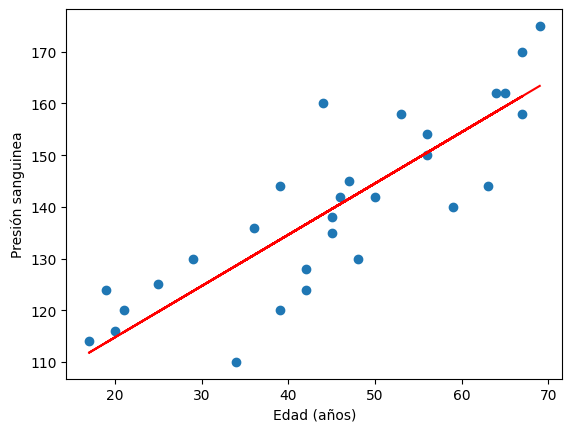

In [97]:
Y_hat = w[0]*X + b[0]
plt.scatter(X,Y)
plt.plot(X,Y_hat,color='red')
plt.xlabel("Edad (años)")
plt.ylabel("Presión sanguinea")
plt.show()

Text(0, 0.5, 'MSE')

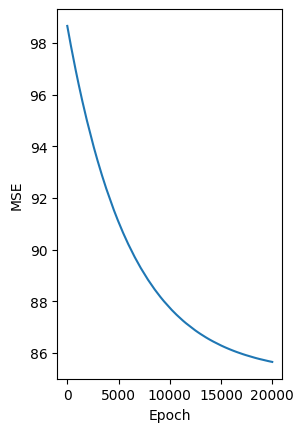

In [98]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("MSE")

In [99]:
x_pred = 22
y_pred = model.predict([x_pred])
y_pred

1/1 [==============================] - 0s 55ms/step


array([[116.72775]], dtype=float32)